In [1]:
#1(a)
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures
from sklearn import cross_validation
import matplotlib.pyplot as plt
import prettytable as pt
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")
data = pd.read_csv("hw2.csv",dtype=float,delimiter=',')


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#1(b)
#(i)
print('size of rows and columns:',data.shape)
#rows: 9568  columns:5
#each row represents a plant in specific environment and its net hourly electrical energy output
#each column stands for a certain feature


size of rows and columns: (9568, 5)


my findings:there is a strong linear relationship between AT&V,AT&PE,V&PE


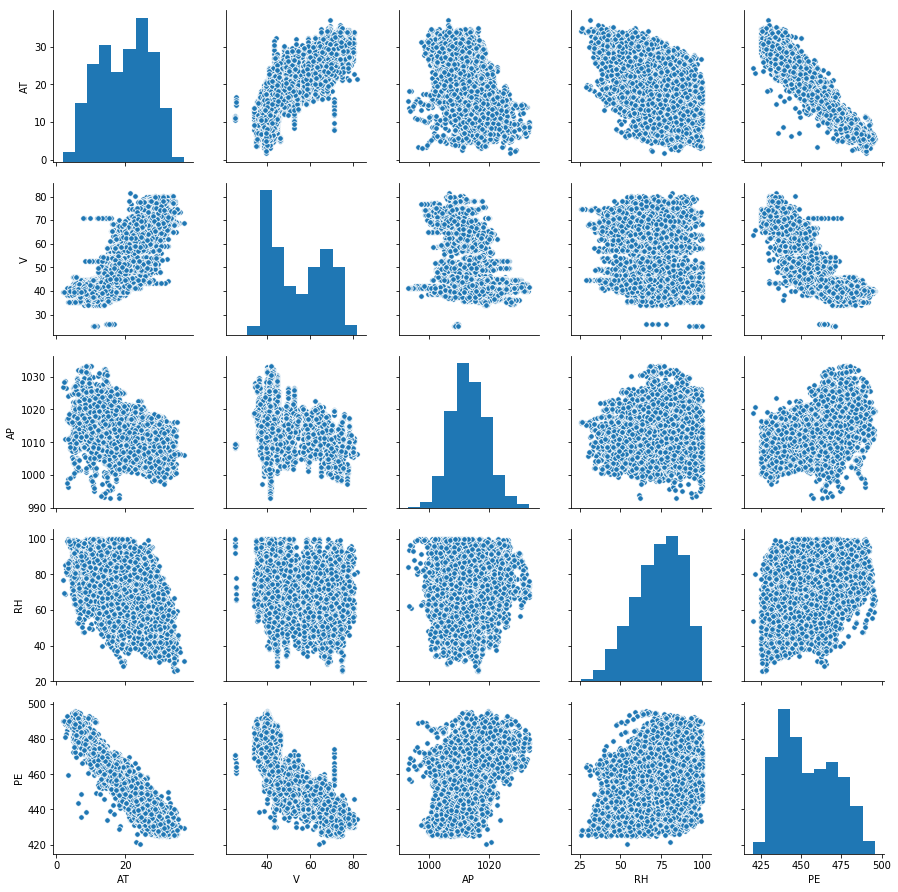

In [3]:
#(ii)
scatterPlot1 = sns.pairplot(data,plot_kws={'s':30})
print("my findings:there is a strong linear relationship between AT&V,AT&PE,V&PE")

In [4]:
#(iii)
table = data.describe()
table.loc['range'] = table.loc['max'] - table.loc['min']    
table.loc['IQR'] = table.loc['75%'] - table.loc['25%']    
table.rename(index={'50%':'median'},inplace=True)
print(table)

                 AT            V           AP           RH           PE
count   9568.000000  9568.000000  9568.000000  9568.000000  9568.000000
mean      19.651231    54.305804  1013.259078    73.308978   454.365009
std        7.452473    12.707893     5.938784    14.600269    17.066995
min        1.810000    25.360000   992.890000    25.560000   420.260000
25%       13.510000    41.740000  1009.100000    63.327500   439.750000
median    20.345000    52.080000  1012.940000    74.975000   451.550000
75%       25.720000    66.540000  1017.260000    84.830000   468.430000
max       37.110000    81.560000  1033.300000   100.160000   495.760000
range     35.300000    56.200000    40.410000    74.600000    75.500000
IQR       12.210000    24.800000     8.160000    21.502500    28.680000


In [5]:
#1(c)

def slinreg(parameter):
    linreg = LinearRegression()
    #print(data['PE'])
    x = data[parameter].values.reshape(-1,1)
    y = data['PE']
    model=linreg.fit(x,y)
    return [linreg.coef_,linreg.intercept_,model.score(x,y),linreg.predict(x)]
    

+----+---------------+--------------------+---------------------+
|    |      coef     |     intercept      |          r2         |
+----+---------------+--------------------+---------------------+
| AT | [-2.17131996] | 497.03411989276674 |  0.8989475964148236 |
| V  | [-1.16813513] | 517.8015263083856  |  0.7565177870683979 |
| AP |  [1.48987167] | -1055.260988984443 |  0.2687686564110673 |
| RH |  [0.4556501]  |  420.961766155484  | 0.15193944023117578 |
+----+---------------+--------------------+---------------------+
there is a statistically significant association between AT&PE, V&PE
AT outliers: (array([], dtype=int64),)
V outliers: (array([], dtype=int64),)
AP outliers: (array([ 319,  536,  669,  715,  753,  810,  847, 1091, 1250, 1660, 2298,
       2481, 2579, 2761, 3015, 3021, 3213, 3412, 3483, 3796, 3955, 4067,
       4125, 4327, 5431, 5529, 5690, 5805, 5840, 5863, 5928, 5956, 6006,
       6346, 6789, 7077, 7186, 7320, 7485, 7807, 7892, 8098, 8104, 8133,
       8270, 8462, 8

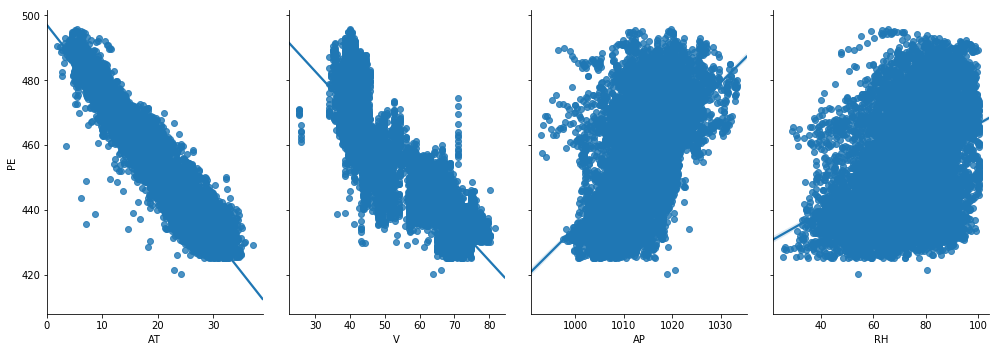

In [6]:
at = slinreg('AT')
v = slinreg('V')
ap = slinreg('AP')
rh = slinreg('RH')
#coef
slin_coef = [at[0],v[0],ap[0],rh[0]]
#intercept
slin_intercept = [at[1],v[1],ap[1],rh[1]]
#prediction
slin_prediction = [at[2],v[2],ap[2],rh[2]]
#r2
slin_r2 = [at[3],v[3],ap[3],rh[3]]

tb = pt.PrettyTable()
tb.field_names = [" ","coef", "intercept", "r2"]
tb.add_row(["AT",at[0],at[1],at[2]])
tb.add_row(["V",v[0],v[1],v[2]])
tb.add_row(["AP",ap[0],ap[1],ap[2]])
tb.add_row(["RH",rh[0],rh[1],rh[2]])
print(tb)
print("there is a statistically significant association between AT&PE, V&PE")

sns.pairplot(data, x_vars=['AT','V','AP','RH'], y_vars='PE',kind="reg",height=5, aspect=0.7)

def outliers_z_score(ys):
    threshold = 3
    mean_y = np.mean(ys)
    stdev_y = np.std(ys)
    z_scores = [(y - mean_y) / stdev_y for y in ys]
    return np.where(np.abs(z_scores) > threshold)

print('AT outliers:' ,outliers_z_score(data['AT']))
print('V outliers:' ,outliers_z_score(data['V']))
print('AP outliers:',outliers_z_score( data['AP']))
print('RH outliers:' ,outliers_z_score(data['RH']))

In [7]:
#1(d)
import statsmodels.api as sm
est_d = smf.ols(formula='PE ~ AT+V+AP+RH', data=data)
est_d = est_d.fit()
print("mse:",est_d.mse_resid)
print(est_d.summary())
print("According to p-value, we can reject the null hypothesis H0 :βj =0?  for all predictors")
mulreg_coef = [est_d.params[1],est_d.params[2],est_d.params[3],est_d.params[4]]
print(est_d.params[1])

mse: 20.778255734737524
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Sun, 23 Sep 2018   Prob (F-statistic):               0.00
Time:                        21:58:28   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    454.6093      9

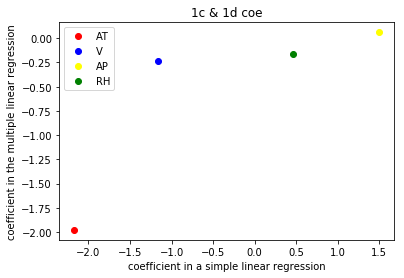

In [8]:
#(1)e
plt.title("1c & 1d coe") 
#plt.xlim(xmax=7,xmin=0)
#plt.ylim(ymax=7,ymin=0)
plt.xlabel("coefficient in a simple linear regression")
plt.ylabel("coefficient in the multiple linear regression")
plt.plot(slin_coef[0],mulreg_coef[0],'ro',color='red',label='AT')
plt.plot(slin_coef[1],mulreg_coef[1],'ro',color='blue')
plt.plot(slin_coef[2],mulreg_coef[2],'ro',color='yellow')
plt.plot(slin_coef[3],mulreg_coef[3],'ro',color='green')
plt.legend(labels=['AT','V','AP','RH'], loc = 'best')

plt.show()

In [9]:
#1(f)
mul_AT = smf.ols(formula='PE ~ np.power(AT,3)+np.power(AT,2)+AT', data=data.iloc[:,[0,4]])
mul_AT = mul_AT.fit()
print(mul_AT.summary())

mul_V = smf.ols(formula='PE ~ np.power(V,3)+np.power(V,2)+V', data=data.iloc[:,[1,4]])
mul_V = mul_V.fit()
print(mul_V.summary())

mul_AP = smf.ols(formula='PE ~ np.power(AP,3)+np.power(AP,2)+AP', data=data.iloc[:,[2,4]])
mul_AP = mul_AP.fit()
print(mul_AP.summary())

mul_RH = smf.ols(formula='PE ~ np.power(RH,3)+np.power(RH,2)+RH', data=data.iloc[:,[3,4]])
mul_RH = mul_RH.fit()
print(mul_RH.summary())

#answer to this question
print("According to p-value, AT,AP,RH may have a nonlinear association between PE ")

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Sun, 23 Sep 2018   Prob (F-statistic):               0.00
Time:                        21:58:28   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         492.7281      0.673    7

In [10]:
#1(g)
X = data
X2 = sm.add_constant(X)
estg = smf.ols(formula='PE ~ AT*V+AT*AP+AT*RH+V*AP+V*RH+AP*RH', data=X2)
est_g = estg.fit()
print(est_g.summary())
print('r-square:',est_g.rsquared)

#answer to this question:
print("According to p-values, AT*V,AT*RH,V*AP are statistically significant")

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Sun, 23 Sep 2018   Prob (F-statistic):               0.00
Time:                        21:58:28   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    685.7825     78.640      8.721      0.0

In [11]:
#(1)h
x_raw = data.iloc[:,0:4]
y_raw = data.iloc[:,-1]
x_train_raw, x_test_raw, y_train_raw, y_test_raw =cross_validation.train_test_split(x_raw,y_raw,test_size=0.3,random_state=0)
train_data = pd.concat([x_train_raw,y_train_raw],axis=1)
test_data = pd.concat([x_test_raw,y_test_raw],axis=1)

train=data.sample(frac=0.7)
test = data.drop(train.index)

est_test = smf.ols(formula='PE ~ AT*V+AT*AP+AT*RH+V*AP+V*RH+AP*RH', data=test)
est_test = est_test.fit()
est_train = smf.ols(formula='PE ~ AT*V+AT*AP+AT*RH+V*AP+V*RH+AP*RH', data=train)
est_train = est_train.fit()

print("test data mse",est_test.mse_resid)
print("train data mse",est_train.mse_resid)


test data mse 17.094513699513854
train data mse 19.193332464372347


In [12]:
est_test2 = smf.ols(formula='PE ~ np.power(AT,2)+np.power(V, 2)+np.power(AP, 2)+np.power(RH, 2)+AT*V+AT*AP+AT*RH+V*AP+V*RH+AP*RH', data=test)
est_test2 = est_test2.fit()

est_train2 = smf.ols(formula='PE ~ np.power(AT, 2)+np.power(V, 2)+np.power(AP, 2)+np.power(RH, 2)+AT*V+AT*AP+AT*RH+V*AP+V*RH+AP*RH', data=train)
est_train2 = est_train2.fit()

print(est_train2.summary())
print('r-square:',est_test2.rsquared)

print("test data mse",est_test2.mse_resid)
print("train data mse",est_train2.mse_resid)


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     7013.
Date:                Sun, 23 Sep 2018   Prob (F-statistic):               0.00
Time:                        21:58:29   Log-Likelihood:                -19311.
No. Observations:                6698   AIC:                         3.865e+04
Df Residuals:                    6683   BIC:                         3.875e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -6942.1277   1434.173     

In [13]:
# first remove V*RH
est_test3 = smf.ols(formula='PE ~ np.power(AT, 2)+np.power(V, 2)+np.power(AP, 2)+np.power(RH, 2)+AT*V+AT*AP+AT*RH+V*AP+AP*RH', data=test)
est_test3 = est_test3.fit()

est_train3 = smf.ols(formula='PE ~ np.power(AT, 2)+np.power(V, 2)+np.power(AP, 2)+np.power(RH, 2)+AT*V+AT*AP+AT*RH+V*AP+AP*RH', data=train)
est_train3 = est_train3.fit()

print(est_train3.summary())
print('r-square:',est_test3.rsquared)

print("test data mse",est_test3.mse_resid)
print("train data mse",est_train3.mse_resid)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     7552.
Date:                Sun, 23 Sep 2018   Prob (F-statistic):               0.00
Time:                        21:58:29   Log-Likelihood:                -19312.
No. Observations:                6698   AIC:                         3.865e+04
Df Residuals:                    6684   BIC:                         3.875e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -6811.5263   1430.209     

In [14]:
#remove ap*at
est_test4 = smf.ols(formula='PE ~ np.power(AT, 2)+np.power(V, 2)+np.power(AP, 2)+np.power(RH, 2)+AT*V+AT*RH+V*AP+AP*RH', data=test)
est_test4 = est_test4.fit()

est_train4 = smf.ols(formula='PE ~ np.power(AT, 2)+np.power(V, 2)+np.power(AP, 2)+np.power(RH, 2)+AT*V+AT*RH+V*AP+AP*RH', data=train)
est_train4 = est_train4.fit()

print(est_train4.summary())

print("test data mse",est_test4.mse_resid)
print("train data mse",est_train4.mse_resid)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     8181.
Date:                Sun, 23 Sep 2018   Prob (F-statistic):               0.00
Time:                        21:58:29   Log-Likelihood:                -19313.
No. Observations:                6698   AIC:                         3.865e+04
Df Residuals:                    6685   BIC:                         3.874e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -7670.1794   1239.982     

In [15]:
#remove power v
est_test5 = smf.ols(formula='PE ~ np.power(AT, 2)+np.power(AP, 2)+np.power(RH, 2)+AT*V+AT*RH+V*AP+AP*RH', data=test)
est_test5 = est_test5.fit()

est_train5 = smf.ols(formula='PE ~ np.power(AT, 2)+np.power(AP, 2)+np.power(RH, 2)+AT*V+AT*RH+V*AP+AP*RH', data=train)
est_train5 = est_train5.fit()

print(est_train5.summary())
print("test data mse",est_test5.mse_resid)
print("train data mse",est_train5.mse_resid)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     8926.
Date:                Sun, 23 Sep 2018   Prob (F-statistic):               0.00
Time:                        21:58:29   Log-Likelihood:                -19313.
No. Observations:                6698   AIC:                         3.865e+04
Df Residuals:                    6686   BIC:                         3.873e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -7664.7263   1236.816     

In [16]:
#remove v*ap
est_test6 = smf.ols(formula='PE ~ np.power(AT, 2)+np.power(AP, 2)+np.power(RH, 2)+AT*V+AT*RH+AP*RH', data=test)
est_test6 = est_test6.fit()

est_train6 = smf.ols(formula='PE ~ np.power(AT, 2)+np.power(AP, 2)+np.power(RH, 2)+AT*V+AT*RH+AP*RH', data=train)
est_train6 = est_train6.fit()

print(est_train6.summary())
print('r-square:',est_test6.rsquared)

print("test data mse",est_test6.mse_resid)
print("train data mse",est_train6.mse_resid)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     9800.
Date:                Sun, 23 Sep 2018   Prob (F-statistic):               0.00
Time:                        21:58:29   Log-Likelihood:                -19319.
No. Observations:                6698   AIC:                         3.866e+04
Df Residuals:                    6687   BIC:                         3.874e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -9749.6549   1094.336     

Most suitable k: 1          min raw test error rate: 0.9944250871080139 

Most suitable k: 1          min nor test error rate: 1.0 



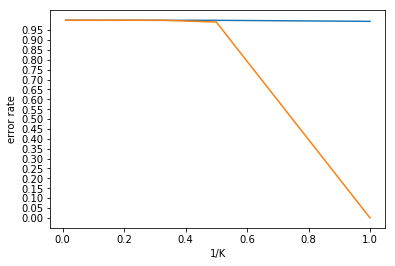

In [17]:
#i
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import DistanceMetric
from sklearn.neighbors import KNeighborsRegressor


def KNNRegressor(x_train,y_train,x_test,y_test,k,p):
    knn = KNeighborsRegressor(n_neighbors=k,p=p)
    knn.fit(x_train,y_train)
    y_predict = knn.predict(x_test)
    errorRes = np.nonzero(y_test - y_predict)[0]
    errorRate = len(errorRes) / len(y_test)
    k_errorRate = [k,errorRate]
    return k_errorRate
def min_max_norm(dataSet):
    max = dataSet.max(axis=0)
    min = dataSet.min(axis=0)
    normData = (dataSet-min)/(max-min)
    return normData

n1 = len(train)
n2 = len(test)
x_train_raw = train.iloc[:,0:4].values.flatten().reshape((n1,4))
y_train_raw = train.iloc[:,-1].values.flatten()
x_test_raw = test.iloc[:,0:4].values.flatten().reshape((n2,4))
y_test_raw = test.iloc[:,-1].values.flatten()
k_testErrors_raw = []

x_train_nor = min_max_norm(train).iloc[:,0:4].values.flatten().reshape((n1,4))
y_train_nor = min_max_norm(train).iloc[:,-1].values.flatten()
x_test_nor = min_max_norm(test).iloc[:,0:4].values.flatten().reshape((n2,4))
y_test_nor = min_max_norm(test).iloc[:,-1].values.flatten()
k_testErrors_nor = []

for i in range(1,101,1):
    k_testErrors_raw.append(KNNRegressor(x_train_raw,y_train_raw,x_test_raw,y_test_raw,i,2))
    k_testErrors_nor.append(KNNRegressor(x_train_nor,y_train_nor,x_test_nor,y_test_nor,i,2))

#calculatr train error
k_trainErrors_raw = []
k_trainErrors_nor = []

for i in range(1,101,1):
    k_trainErrors_raw.append(KNNRegressor(x_train_raw,y_train_raw,x_train_raw,y_train_raw,i,2))
    k_trainErrors_nor.append(KNNRegressor(x_train_nor,y_train_nor,x_train_nor,y_train_nor,i,2))

sortedTrainErrors_raw = sorted(k_trainErrors_raw,key=lambda x: x[1], reverse=False)[0] 
sortedTrainErrors_nor = sorted(k_trainErrors_nor,key=lambda x: x[1], reverse=False)[0] 

#find the best k=k*
sortedresult_raw = sorted(k_testErrors_raw,key=lambda x: x[1], reverse=False)[0] 
sortedresult_nor = sorted(k_testErrors_nor,key=lambda x: x[1], reverse=False)[0] 

bestk_raw = sortedresult_raw[0]
bestk_nor = sortedresult_nor[0]

print('Most suitable k:',bestk_raw,'         min raw test error rate:',sortedresult_raw[1],'\n')
print('Most suitable k:',bestk_nor,'         min nor test error rate:',sortedresult_nor[1],'\n')

#plot
#plot train and test errors
fig = plt.figure()
ax = plt.axes()
ax.set_xlabel('1/K') 
ax.set_ylabel('error rate')
x = [1/item[0] for item in k_testErrors_raw]
y = [item[1] for item in k_testErrors_raw]
x2 = [1/item[0] for item in k_trainErrors_raw]
y2 = [item[1] for item in k_trainErrors_raw]
plt.plot(x, y);plt.plot(x2, y2);
plt.yticks(np.arange(0,1,0.05))
plt.show()

In [18]:
print("According to the result, the error rate is extremely large using KNN regression(around 0.99),it can hardly predict the PE. While linear rgression has a better permformance, with r sqare more than 0.9. PE is a continuous dependent rater than a distributive property. It is nearly impossible to predict the test data correctly.")

According to the result, the error rate is extremely large using KNN regression(around 0.99),it can hardly predict the PE. While linear rgression has a better permformance, with r sqare more than 0.9. PE is a continuous dependent rater than a distributive property. It is nearly impossible to predict the test data correctly.
